   ## Computer Project
   ## Abstract
   This project is an analysis in the trends of the number of infections, deaths and recoveries with respect to the COVID-19 virus. It shows the statistics of the world along with the top 10 countries. It also shows the statistics of India separately. All the statistics are aided with graphs and pie charts for better understanding. The data for this project is taken from https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset . 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
DATA_PATH = "/home/kanishk/Documents/corona_virus/data_sets/"

In [3]:
confirmed_df = pd.read_csv(DATA_PATH + "time_series_covid_19_confirmed.csv")
deaths_df = pd.read_csv(DATA_PATH + "time_series_covid_19_deaths.csv")
recovered_df = pd.read_csv(DATA_PATH + "time_series_covid_19_recovered.csv")
covid_df = pd.read_csv(DATA_PATH + "covid_19_data.csv")

In [4]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180


In [5]:
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2772,2782,2792,2802,2812,2836,2855,2869,2881,2899
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2440,2441,2442,2444,2445,2447,2447,2447,2448,2449
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,3401,3405,3411,3418,3426,3433,3440,3448,3455,3460
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,704,709,715,725,731,735,742,745,749,757


In [6]:
recovered_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,55687,55790,55889,56035,56295,56518,56711,56962,57119,57281
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,127869,128425,128601,128732,128826,128907,128978,129042,129097,129215
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,87902,88066,88208,88346,88497,88672,88861,89040,89232,89419
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13234,13234,13234,13234,13234,13263,13381,13405,13416,13416
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,26483,26513,26775,26778,27087,27204,27467,27529,27577,27646


In [7]:
covid_df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [27]:
def func(pct, allvalues):
    return "{:.1f}".format(pct)

# World wide statistics :

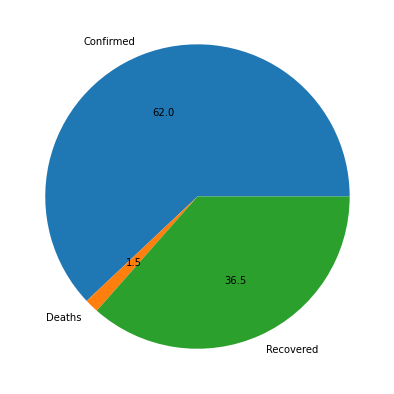

In [9]:
# World wide corona cases
confirmed_cases = np.sum(covid_df["Confirmed"])
death_cases = np.sum(covid_df["Deaths"])
recovered_cases = np.sum(covid_df["Recovered"])
labels = ['Confirmed', 'Deaths', 'Recovered']
fig = plt.figure(figsize =(10, 7))
plt.pie([confirmed_cases, death_cases, recovered_cases], labels=labels, autopct=lambda pct: func(pct, labels))
plt.show()

In [10]:
# Top 10 countries
top_10_confirmed = confirmed_df.sort_values(['5/29/21']).tail(10)
top_10_confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
134,NaN,Germany,51.165691,10.451526,0,0,0,0,0,1,...,3638504,3646600,3653019,3657662,3659990,3662568,3667041,3673990,3680159,3684672
6,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,3447044,3482512,3514683,3539484,3562135,3586736,3622135,3663215,3702422,3732263
153,NaN,Italy,41.871940,12.567380,0,0,0,0,0,0,...,4178261,4183476,4188190,4192183,4194672,4197892,4201827,4205970,4209707,4213055
266,NaN,United Kingdom,55.378100,-3.436000,0,0,0,0,0,0,...,4455221,4457923,4460446,4462538,4464900,4467310,4470297,4473677,4477705,4480945
215,NaN,Russia,61.524010,105.318756,0,0,0,0,0,0,...,4917906,4926717,4935302,4944129,4952412,4960174,4968421,4977332,4986458,4995613
250,NaN,Turkey,38.963700,35.243300,0,0,0,0,0,0,...,5160423,5169951,5178648,5186487,5194010,5203385,5212123,5220549,5228322,5235978
130,NaN,France,46.227600,2.213700,0,0,2,3,3,3,...,5514022,5526555,5538938,5547914,5550143,5552977,5564217,5578150,5588981,5600353
30,NaN,Brazil,-14.235000,-51.925300,0,0,0,0,0,0,...,15894094,15970949,16047439,16083258,16120756,16194209,16274695,16342162,16391930,16471600
147,NaN,India,20.593684,78.962880,0,0,0,0,0,0,...,26031991,26289290,26530132,26752447,26948874,27157795,27369093,27555457,27729247,27894800
251,NaN,US,40.000000,-100.000000,1,1,2,2,5,5,...,33056765,33085106,33104884,33117737,33143662,33166418,33190470,33217995,33239963,33251939


In [11]:
x_values = top_10_confirmed.columns[4:]
y_values = []
legends = top_10_confirmed['Country/Region'].values
for row in top_10_confirmed.iterrows():
    y_values.append(row[1][x_values].values)

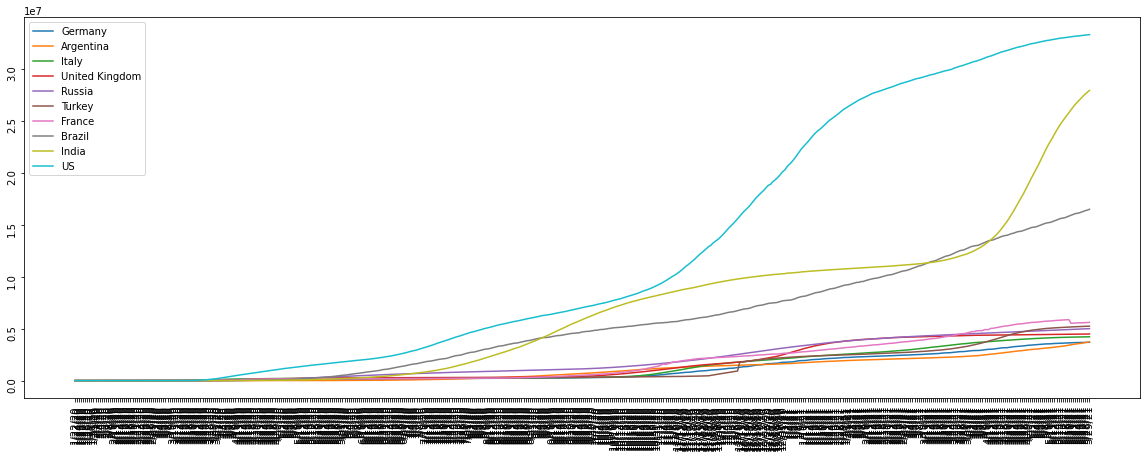

In [12]:
fig = plt.figure(figsize =(20, 7))

for values in y_values:
    plt.plot(x_values, values)
plt.yticks(rotation=90)
plt.xticks(rotation=90)
plt.legend(legends)
plt.show()

# Top 10 countries with respect to deaths :

In [13]:
top_10_deaths = deaths_df.sort_values(['5/29/21']).tail(10)
top_10_deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
92,NaN,Colombia,4.570900,-74.297300,0,0,0,0,0,0,...,83233,83719,84228,84724,85207,85666,86180,86693,87207,87747
134,NaN,Germany,51.165691,10.451526,0,0,0,0,0,0,...,87135,87303,87385,87429,87461,87733,88000,88192,88360,88413
130,NaN,France,46.227600,2.213700,0,0,0,0,0,0,...,107522,107645,107732,107789,107851,108071,108201,108343,108466,108532
215,NaN,Russia,61.524010,105.318756,0,0,0,0,0,0,...,115393,115764,116144,116497,116812,117197,117595,117990,118386,118781
153,NaN,Italy,41.871940,12.567380,0,0,0,0,0,0,...,124810,125028,125153,125225,125335,125501,125622,125793,125919,126002
266,NaN,United Kingdom,55.378100,-3.436000,0,0,0,0,0,0,...,127701,127710,127716,127721,127724,127739,127748,127758,127768,127775
183,NaN,Mexico,23.634500,-102.552800,0,0,0,0,0,0,...,221080,221256,221597,221647,221695,221960,222232,222661,223072,223455
147,NaN,India,20.593684,78.962880,0,0,0,0,0,0,...,291331,295525,299266,303720,307231,311388,315235,318895,322512,325972
30,NaN,Brazil,-14.235000,-51.925300,0,0,0,0,0,0,...,444094,446309,448208,449068,449858,452031,454429,456674,459045,461057
251,NaN,US,40.000000,-100.000000,0,0,0,0,0,0,...,588620,589223,589703,589893,590320,590941,591950,593288,593963,594306


In [14]:
x_values = top_10_deaths.columns[4:]
y_values = []
legends = top_10_deaths['Country/Region'].values
for row in top_10_deaths.iterrows():
    y_values.append(row[1][x_values].values)

# Top 10 countries with respect to confirmed cases :

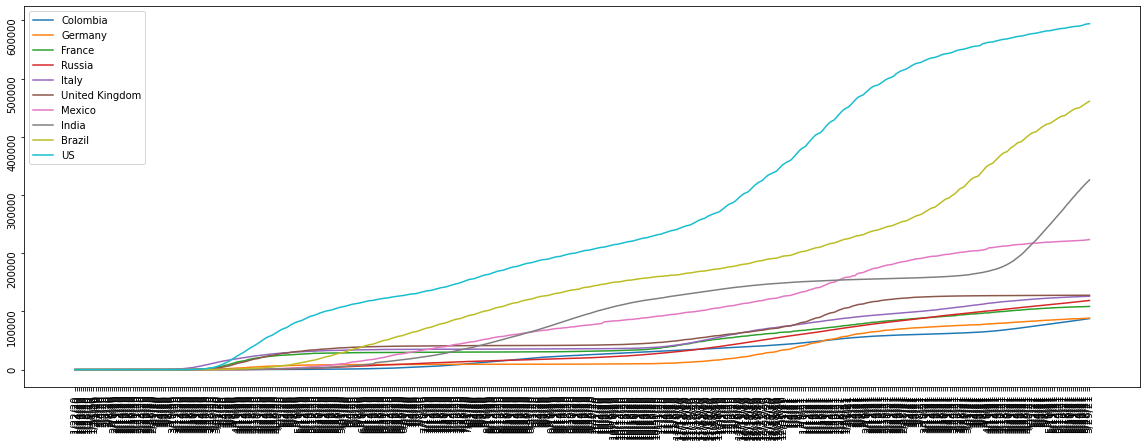

In [15]:
fig = plt.figure(figsize =(20, 7))

for values in y_values:
    plt.plot(x_values, values)
plt.yticks(rotation=90)
plt.xticks(rotation=90)
plt.legend(legends)
plt.show()

# Top 10 countries with respect to recoveries :

In [31]:
top_10_recovered = recovered_df.sort_values(['5/29/21']).tail(10)
top_10_recovered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
134,NaN,Iran,32.427908,53.688046,0,0,0,0,0,0,...,2290613,2304824,2319746,2333789,2347752,2362428,2379139,2396540,2410252,2425033
196,NaN,Poland,51.919400,19.145100,0,0,0,0,0,0,...,2614020,2618031,2621686,2624724,2627679,2629626,2630581,2632483,2634711,2636675
77,NaN,Colombia,4.570900,-74.297300,0,0,0,0,0,0,...,2979233,2998123,3011234,3026277,3046147,3063330,3078965,3101390,3121888,3141549
6,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,3035134,3060145,3083298,3106949,3133183,3157660,3181288,3219474,3252843,3288467
119,NaN,Germany,51.165691,10.451526,0,0,0,0,0,0,...,3376100,3390400,3398700,3410040,3425380,3439570,3452290,3463130,3472650,3479700
138,NaN,Italy,41.871940,12.567380,0,0,0,0,0,0,...,3753965,3766660,3779293,3785866,3792898,3804246,3816176,3826984,3837518,3845087
200,NaN,Russia,61.524010,105.318756,0,0,0,0,0,0,...,4538909,4548028,4557146,4564408,4570842,4579421,4588421,4598014,4607276,4616422
235,NaN,Turkey,38.963700,35.243300,0,0,0,0,0,0,...,4989787,4998639,5013111,5024313,5034316,5045508,5057713,5070815,5083099,5094279
30,NaN,Brazil,-14.235000,-51.925300,0,0,0,0,0,0,...,14080089,14103800,14132443,14132443,14190644,14231991,14272174,14455810,14492701,14496224
132,NaN,India,20.593684,78.962880,0,0,0,0,0,0,...,22712735,23070365,23425467,23728011,24054861,24350816,24633951,24893410,25178011,25454320


In [17]:
x_values = top_10_recovered.columns[4:]
y_values = []
legends = top_10_recovered['Country/Region'].values
for row in top_10_recovered.iterrows():
    y_values.append(row[1][x_values].values)

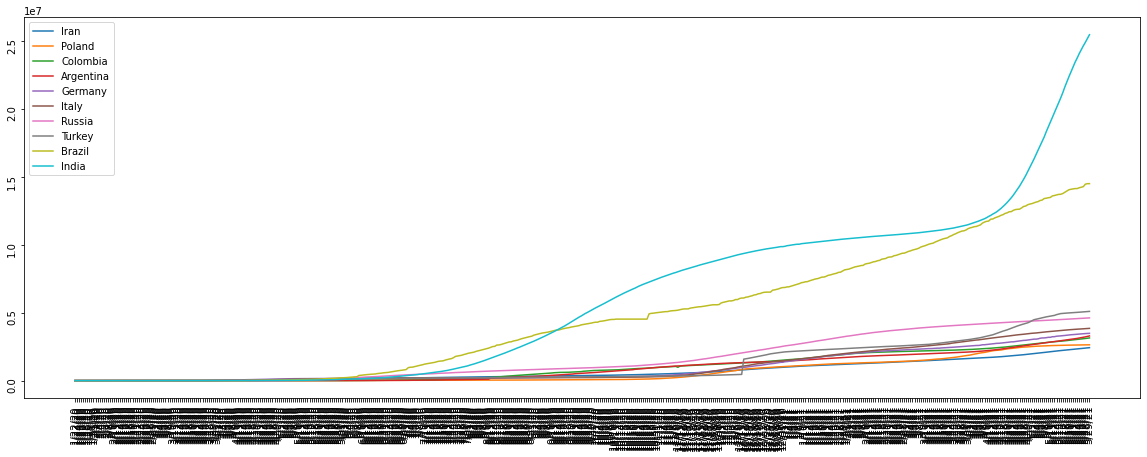

In [18]:
fig = plt.figure(figsize =(20, 7))

for values in y_values:
    plt.plot(x_values, values)
plt.yticks(rotation=90)
plt.xticks(rotation=90)
plt.legend(legends)
plt.show()

# Statistics of India : 

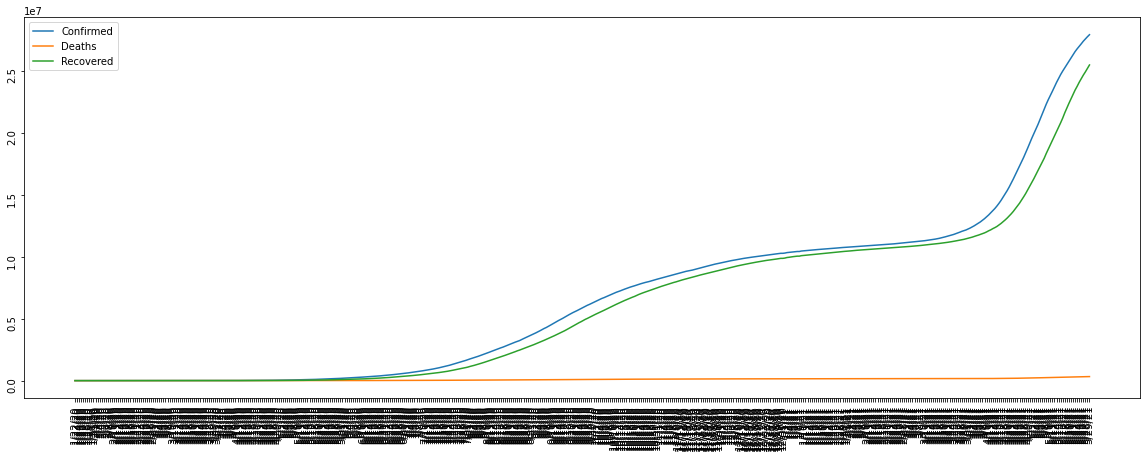

In [20]:
india_y_values=[]
india_y_values.append(confirmed_df[confirmed_df['Country/Region'] == 'India'].values[0][4:])
india_y_values.append(deaths_df[deaths_df['Country/Region'] == 'India'].values[0][4:])
india_y_values.append(recovered_df[recovered_df['Country/Region'] == 'India'].values[0][4:])

fig = plt.figure(figsize =(20, 7))

for values in india_y_values:
    plt.plot(x_values, values)
plt.yticks(rotation=90)
plt.xticks(rotation=90)
plt.legend(['Confirmed','Deaths','Recovered'])
plt.show()

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

DATA_PATH = "/home/kanishk/Documents/corona_virus/data_sets/"

confirmed_df = pd.read_csv(DATA_PATH + "time_series_covid_19_confirmed.csv")
deaths_df = pd.read_csv(DATA_PATH + "time_series_covid_19_deaths.csv")
recovered_df = pd.read_csv(DATA_PATH + "time_series_covid_19_recovered.csv")
covid_df = pd.read_csv(DATA_PATH + "covid_19_data.csv")

print("What would you like to know?")
print("1. World wide statistics")
print("2. Top 10 countries with respect to infected cases")
print("3. Top 10 countries with respect to deaths")
print("4. Top 10 countries with respect to recoveries")
print("5. Indian Statistics")
choice=input("Choose an option : ")

def func(pct, allvalues):
    return "{:.1f}".format(pct)

if choice == '1':
    confirmed_cases = np.sum(covid_df["Confirmed"])
    death_cases = np.sum(covid_df["Deaths"])
    recovered_cases = np.sum(covid_df["Recovered"])
    labels = ['Confirmed', 'Deaths', 'Recovered']
    fig = plt.figure(figsize =(10, 7))
    plt.pie([confirmed_cases, death_cases, recovered_cases], labels=labels, autopct=lambda pct: func(pct, labels))
    plt.show()
    
elif choice == '2':
    top_10_confirmed = confirmed_df.sort_values(['5/29/21']).tail(10)
    print(top_10_confirmed)
    
    x_values = top_10_confirmed.columns[4:]
    y_values = []
    legends = top_10_confirmed['Country/Region'].values
    for row in top_10_confirmed.iterrows():
        y_values.append(row[1][x_values].values)
        
    fig = plt.figure(figsize =(20, 7))

    for values in y_values:
        plt.plot(x_values, values)
    plt.yticks(rotation=90)
    plt.xticks(rotation=90)
    plt.legend(legends)
    plt.show()
    
elif choice == '3':
    top_10_deaths = deaths_df.sort_values(['5/29/21']).tail(10)
    print(top_10_deaths)
    
    x_values = top_10_recovered.columns[4:]
    y_values = []
    legends = top_10_recovered['Country/Region'].values
    for row in top_10_recovered.iterrows():
        y_values.append(row[1][x_values].values)
        
    fig = plt.figure(figsize =(20, 7))

    for values in y_values:
        plt.plot(x_values, values)
    plt.yticks(rotation=90)
    plt.xticks(rotation=90)
    plt.legend(legends)
    plt.show()
    
elif choice == '4':
    top_10_recovered = recovered_df.sort_values(['5/29/21']).tail(10)
    print(top_10_recovered)
    
    x_values = top_10_recovered.columns[4:]
    y_values = []
    legends = top_10_recovered['Country/Region'].values
    for row in top_10_recovered.iterrows():
        y_values.append(row[1][x_values].values)
        
    fig = plt.figure(figsize =(20, 7))

    for values in y_values:
        plt.plot(x_values, values)
    plt.yticks(rotation=90)
    plt.xticks(rotation=90)
    plt.legend(legends)
    plt.show()
    
elif choice == '5':
    india_y_values=[]
    india_y_values.append(confirmed_df[confirmed_df['Country/Region'] == 'India'].values[0][4:])
    india_y_values.append(deaths_df[deaths_df['Country/Region'] == 'India'].values[0][4:])
    india_y_values.append(recovered_df[recovered_df['Country/Region'] == 'India'].values[0][4:])

    fig = plt.figure(figsize =(20, 7))

    for values in india_y_values:
        plt.plot(x_values, values)
    plt.yticks(rotation=90)
    plt.xticks(rotation=90)
    plt.legend(['Confirmed','Deaths','Recovered'])
    plt.show()
    
else:
    print("This choice doesn't exist!")

What would you like to know?
1. World wide statistics
2. Top 10 countries with respect to infected cases
3. Top 10 countries with respect to deaths
4. Top 10 countries with respect to recoveries
5. Indian Statistics
Choose an option : 3
    Province/State  Country/Region        Lat        Long  1/22/20  1/23/20  \
92             NaN        Colombia   4.570900  -74.297300        0        0   
134            NaN         Germany  51.165691   10.451526        0        0   
130            NaN          France  46.227600    2.213700        0        0   
215            NaN          Russia  61.524010  105.318756        0        0   
153            NaN           Italy  41.871940   12.567380        0        0   
266            NaN  United Kingdom  55.378100   -3.436000        0        0   
183            NaN          Mexico  23.634500 -102.552800        0        0   
147            NaN           India  20.593684   78.962880        0        0   
30             NaN          Brazil -14.235000  -51.9

NameError: name 'top_10_recovered' is not defined